<a href="https://colab.research.google.com/github/Priyanraj5959/Netflix-Project-/blob/main/NETFLIX_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data set and making copy of it

In [ ]:
d1 = pd.read_csv("Netflix.csv")
df = d1.copy()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Pre-Processing of Netflix Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.fillna({"director":"unavailable","cast":"unavailable","country":"unavailable"
,"rating":"unavailable"},inplace=True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [ ]:
df[df["date_added"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,unavailable,Igor Dmitriev,unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
most_recent_entry_date = df["date_added"].max()
df.fillna({"date_added": most_recent_entry_date},inplace = True )

<ipython-input-252-a5c09cc1e04c>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna({"date_added": most_recent_entry_date},inplace = True )


In [ ]:
df[df.show_id == "s6067"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [ ]:
df[df["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df[df.director == "Louis C.K."].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[df["director"] == "Louis C.K.","duration"] = df["rating"]
df[df.director == "Louis C.K."].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[df["director"] == "Louis C.K.","rating"] = "unavailable"
df[df.director == "Louis C.K."].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df[["Minutes","unit"]]=df["duration"].str.split(' ',expand=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min
8803,s8804,TV Show,Zombie Dumb,unavailable,unavailable,unavailable,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,min


In [ ]:
df['duration'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min
8803,s8804,TV Show,Zombie Dumb,unavailable,unavailable,unavailable,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,min


In [ ]:
df[df.duplicated()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,unit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  Minutes       8807 non-null   object        
 13  unit          8807 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 963.4+ KB


In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Minutes         0
unit            0
dtype: int64

1. **Defining Problem Statement and Analysing basic metrics (10 Points)**              
The problem statement is about helping Netflix decide which type of tv shows/movies to produce and how to grow the business in different countries.

Analysing basic metrics

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,unit
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min
8803,s8804,TV Show,Zombie Dumb,unavailable,unavailable,unavailable,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,min
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,min


In [ ]:
df.shape

(8807, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  Minutes       8807 non-null   object        
 13  unit          8807 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 963.4+ KB


In [ ]:
df['country'].nunique()

749

In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
total_movies = df[df['type'] == 'Movie'].shape[0]

In [ ]:
total_tv_shows = df[df['type'] == 'TV Show'].shape[0]

In [ ]:
percentage_movies = (total_movies / (total_movies + total_tv_shows)) * 100
print("Percentage of movies:", percentage_movies)

Percentage of movies: 69.61507891449983


In [ ]:
percentage_tv_shows = (total_tv_shows / (total_movies + total_tv_shows)) * 100
print("Percentage of TV shows:", percentage_tv_shows)

Percentage of TV shows: 30.38492108550017


In [ ]:
most_common_tv_release_year = df[df['type'] == 'TV Show']['release_year'].mode()[0]
print("Most common TV show release year:", most_common_tv_release_year)

Most common TV show release year: 2020


Q2 Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  Minutes       8807 non-null   object        
 13  unit          8807 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 963.4+ KB


In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Minutes         0
unit            0
dtype: int64

In [ ]:
 df.describe(include='all')

<ipython-input-276-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,unit
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8807.000000,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1714,NaN,15,NaN,514,8775,210,3
top,s1,Movie,Dick Johnson Is Dead,unavailable,unavailable,United States,2020-01-01 00:00:00,NaN,TV-MA,NaN,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",1,min
freq,1,6131,1,2634,825,2818,110,NaN,3207,NaN,362,4,1793,6131
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,69.848530,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,50.806431,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,2.000000,NaN,NaN,NaN,NaN


Q 3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

In [ ]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'count vs title ')

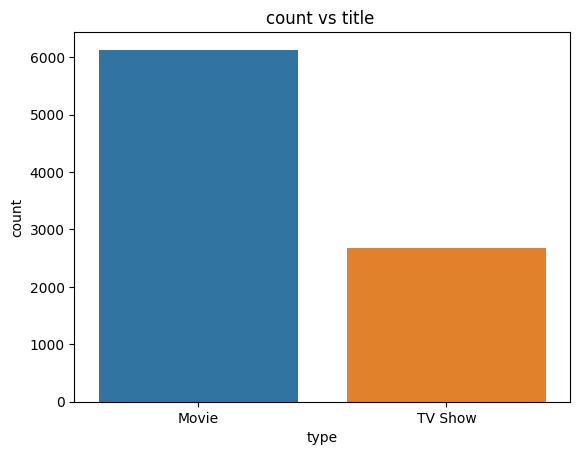

In [ ]:
sns.countplot(x= "type" ,data = df)
plt.title ("count vs title ")

In [ ]:
df["country"].value_counts().head(10)

United States     2818
India              972
unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'Country wise content on Netflix')

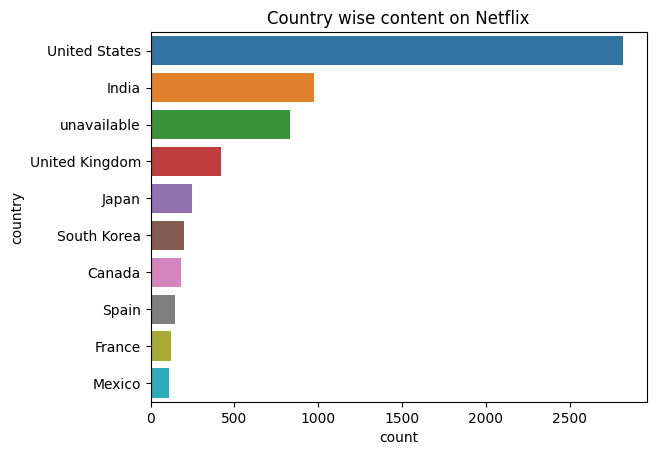

In [ ]:
sns.countplot(y="country" ,order =df["country"].value_counts().index[0:10],data=df)
plt.title("Country wise content on Netflix")

In [ ]:
movie_countries = df[df["type"] == "Movie"]
tv_show_countries = df[df["type"] == "TV Show"]

Text(0.5, 1.0, 'Top 10 Countries producing movies in Netflix')

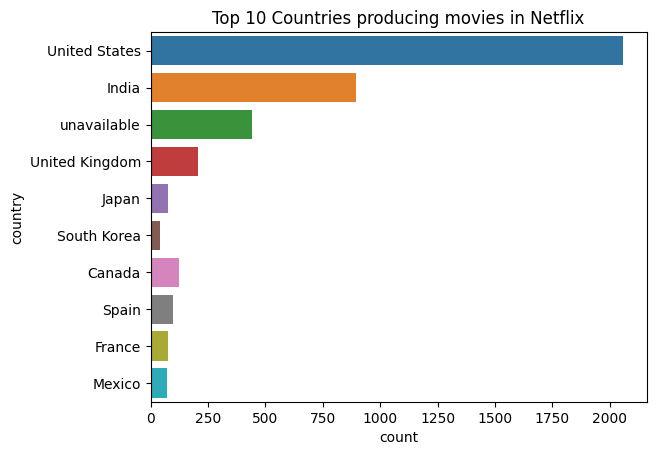

In [ ]:
sns.countplot(y="country" ,order =df["country"].value_counts().index[0:10],data=movie_countries)
plt.title("Top 10 Countries producing movies in Netflix")

Text(0.5, 1.0, 'Top 10 Countries producing tv show in Netflix')

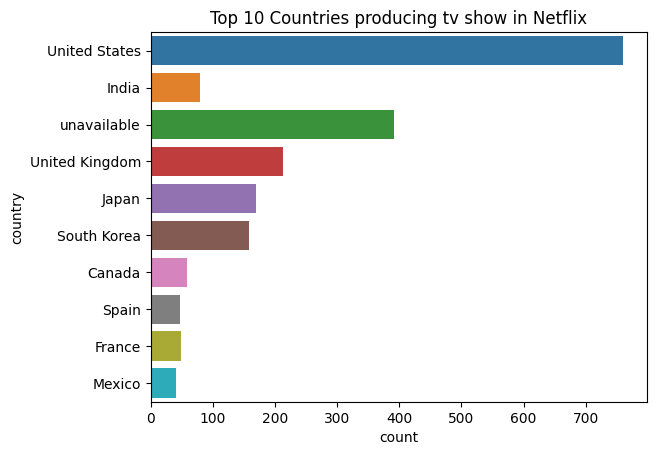

In [ ]:
sns.countplot(y="country" ,order =df["country"].value_counts().index[0:10],data=tv_show_countries)
plt.title("Top 10 Countries producing tv show in Netflix")

In [ ]:
df.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
unavailable       7
TV-Y7-FV          6
NC-17             3
UR                3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating of shows on Netflix vs count ')

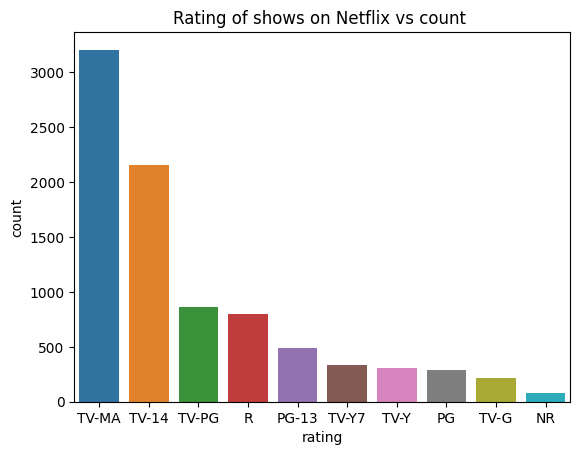

In [ ]:
sns.countplot(x="rating" ,order =df["rating"].value_counts().index[0:10],data=df)
plt.title("Rating of shows on Netflix vs count ")

In [ ]:
df.release_year.value_counts()[:20]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Content Release on Netflix in years')

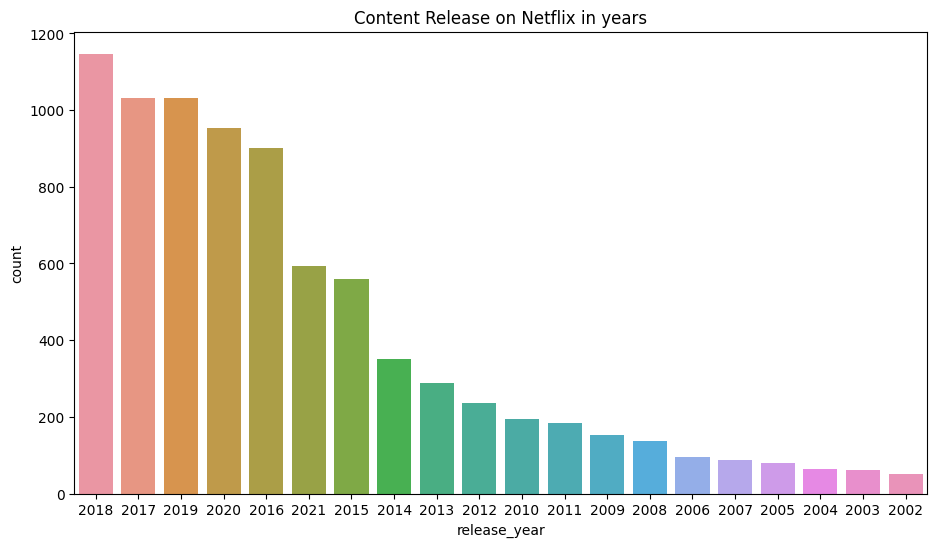

In [ ]:
plt.figure(figsize =(11,6))
sns.countplot(x="release_year" ,order =df["release_year"].value_counts().index[0:20],data=df)
plt.title("Content Release on Netflix in years")

In [ ]:
df.listed_in.value_counts()[:20]

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

Text(0.5, 1.0, 'Top 20 Generes in Netflix ')

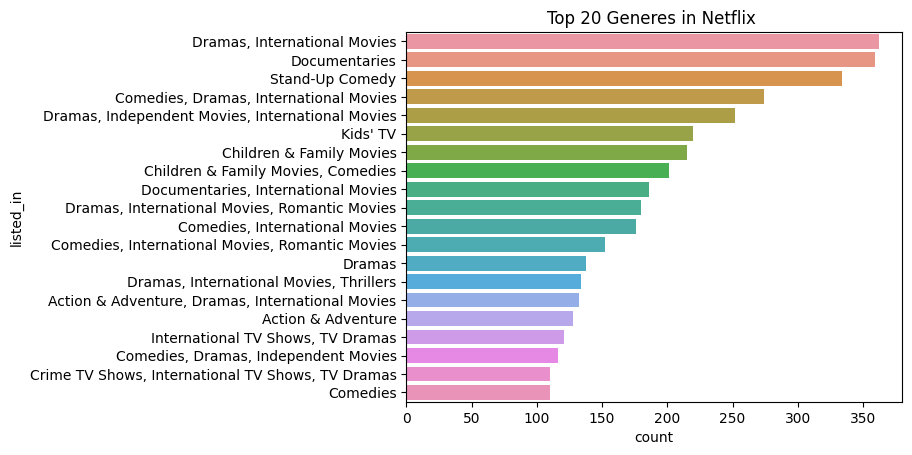

In [ ]:
sns.countplot(y="listed_in" ,order =df["listed_in"].value_counts().index[0:20],data=df)
plt.title("Top 20 Generes in Netflix ")

In [ ]:
df["director"].value_counts().head(20)

unavailable               2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            11
Don Michael Paul            10
David Dhawan                 9
Yılmaz Erdoğan               8
Quentin Tarantino            8
Lance Bangs                  8
Shannon Hartman              8
Troy Miller                  8
Kunle Afolayan               8
Johnnie To                   8
Name: director, dtype: int64

Text(0.5, 1.0, ' Number of Movies made by Director ')

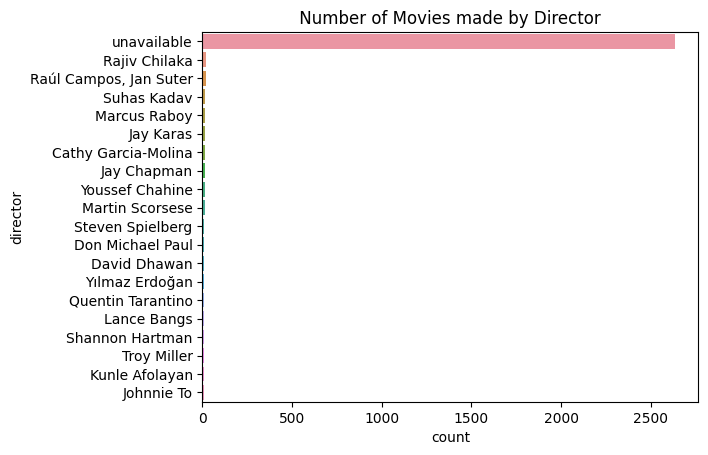

In [ ]:
sns.countplot(y="director" ,order =df["director"].value_counts().index[0:20],data=df)
plt.title(" Number of Movies made by Director ")

In [ ]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'unavailable', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [ ]:
df["country"].unique()

array(['United States', 'South Africa', 'unavailable', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, 

In [ ]:
df["country"].nunique()

749

In [ ]:
df["rating"].nunique()

15

In [ ]:
df["director"].nunique()

4529

Q 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

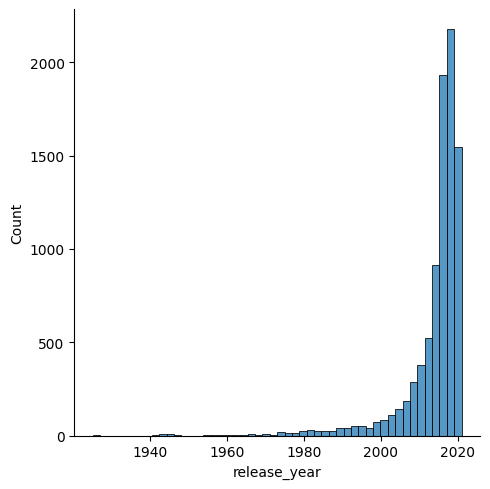

In [ ]:
sns.displot(df['release_year'], bins=50)
plt.show()

4.2 For categorical variable(s): Boxplot (10 Points)

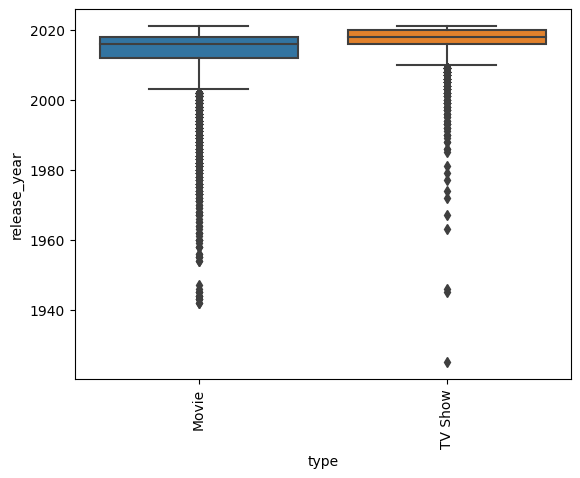

In [ ]:
sns.boxplot(data=df, x='type', y='release_year')
plt.xticks(rotation=90)
plt.show()

4.3 For correlation: Heatmaps, Pairplots (10 Points)

<ipython-input-300-523a8ba97a70>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numerical_columns].corr()


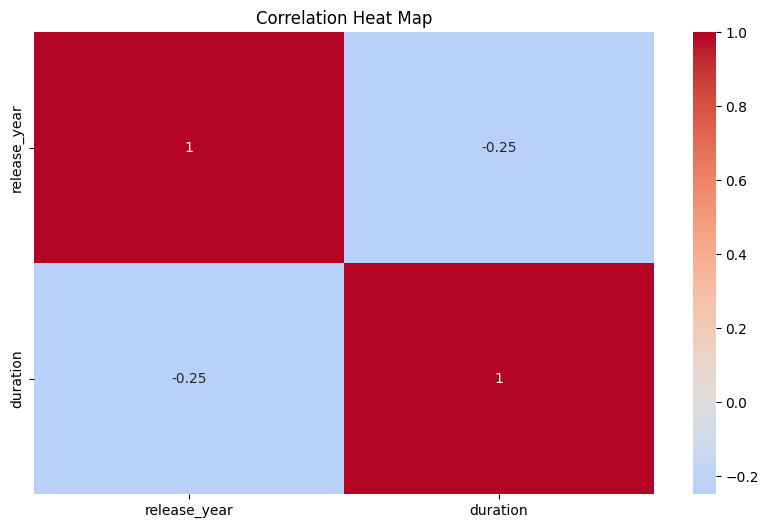

In [ ]:
# Select numerical columns for the heatmap
numerical_columns = ['release_year', 'rating', 'duration']

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heat Map')
plt.show()


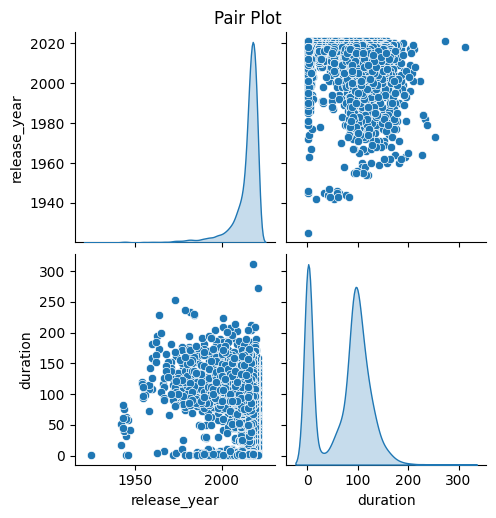

In [ ]:
# Select numerical columns for the pair plot
pairplot_columns = ['release_year', 'rating', 'duration']

# Create a pair plot
sns.pairplot(df[pairplot_columns], diag_kind='kde')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine missing values and missing percentage into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
print(missing_data)


              Missing Values  Missing Percentage
show_id                    0                 0.0
type                       0                 0.0
title                      0                 0.0
director                   0                 0.0
cast                       0                 0.0
country                    0                 0.0
date_added                 0                 0.0
release_year               0                 0.0
rating                     0                 0.0
duration                   0                 0.0
listed_in                  0                 0.0
description                0                 0.0
Minutes                    0                 0.0
unit                       0                 0.0


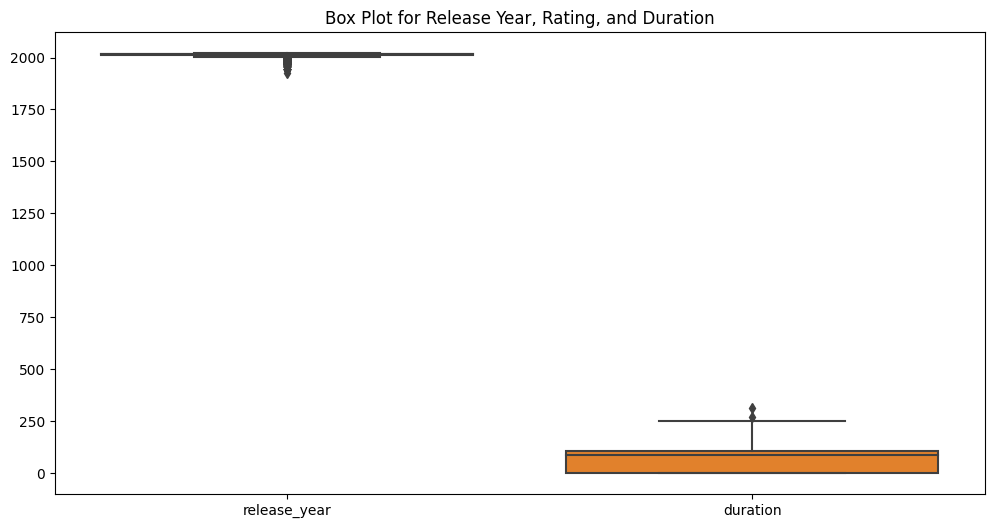

In [ ]:
# Box plot for 'Release_year', 'Rating', and 'Duration'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['release_year', 'rating', 'duration']])
plt.title('Box Plot for Release Year, Rating, and Duration')
plt.show()
